<a href="https://colab.research.google.com/github/eckoecho/Project-2/blob/Part-2/World_Air_Quality_Index_by_City_and_Coordinates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This data comes from [Kaggle, World Air Quality Index (AQI)](https://www.kaggle.com/datasets/adityaramachandran27/world-air-quality-index-by-city-and-coordinates).

The goal of this dataset is to provide valuable insights into the air quality of different regions, allowing researchers and policymakers to make informed decisions on how to address the issue of air pollution.


The target of our dataset is the `AQI Category` column. In this target I will determine if a country/city is a good choice to live based on the values of `Good`, `Moderate`, `Unhealthy for Sensitive Groups`, `Unhealthy`, and `Very Unhealthy`.

Each row represents a city within the world.

Our target is a categorical, deserving of a classification model for analysis.

There are 16695 rows, and 14 columns (13 features) in our dataset.

There are some challenges to learning this dataset including uncovering industry jargon and plotting geographical areas.

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Load Data

In [14]:
fpath="/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week07/Data/AQI and Lat Long of Countries.csv"
df = pd.read_csv(fpath)
df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,44.7444,44.2031
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-5.2900,-44.4900
2,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-11.2958,-41.9869
3,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,37.1667,15.1833
4,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,53.0167,20.8833


In [15]:
#indicating rows and columms
df.shape
print(f"There are {df.shape[0]} rows, and {df.shape[1]} columns in our dataset.")

There are 16695 rows, and 14 columns in our dataset.


In [16]:
#A quick glance at our features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16695 entries, 0 to 16694
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             16393 non-null  object 
 1   City                16695 non-null  object 
 2   AQI Value           16695 non-null  int64  
 3   AQI Category        16695 non-null  object 
 4   CO AQI Value        16695 non-null  int64  
 5   CO AQI Category     16695 non-null  object 
 6   Ozone AQI Value     16695 non-null  int64  
 7   Ozone AQI Category  16695 non-null  object 
 8   NO2 AQI Value       16695 non-null  int64  
 9   NO2 AQI Category    16695 non-null  object 
 10  PM2.5 AQI Value     16695 non-null  int64  
 11  PM2.5 AQI Category  16695 non-null  object 
 12  lat                 16695 non-null  float64
 13  lng                 16695 non-null  float64
dtypes: float64(2), int64(5), object(7)
memory usage: 1.8+ MB


In [17]:
#Viewing the spectrum of values
df.describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,lat,lng
count,16695.000000,16695.000000,16695.000000,16695.000000,16695.000000,16695.000000,16695.000000
mean,62.998682,1.342138,31.767355,3.819647,59.821324,30.267148,-3.944485
std,43.091971,2.371379,22.839343,5.880677,43.208298,22.947398,73.037148
min,7.000000,0.000000,0.000000,0.000000,0.000000,-54.801900,-171.750000
25%,38.500000,1.000000,20.000000,0.000000,34.000000,16.515450,-75.180000
50%,52.000000,1.000000,29.000000,2.000000,52.000000,38.815800,5.643100
75%,69.000000,1.000000,38.000000,5.000000,69.000000,46.683300,36.275000
max,500.000000,133.000000,222.000000,91.000000,500.000000,70.767000,178.017800


> Note: An AQI value of 0.0000 for ozone may occur if the ozone concentration in the air is extremely low or falls below the detection limit of the monitoring equipment. It does not necessarily mean that ozone is completely absent, but rather that it is present at a very low concentration that falls below the threshold for reporting.

# Clean the Data

In [18]:
#Looking for duplicates to drop
df.duplicated().sum()

0

No duplicate values to drop.

In [19]:
#Looping thru the dataset's column values to find any inconsistencies
#I'm including dropna=False to see any NaN values
for col in df:
    print(f"{df[col].value_counts(dropna=False)} \n\n")

United States of America    3954
Germany                     1072
Brazil                       890
Russian Federation           889
Italy                        866
                            ... 
Andorra                        1
Luxembourg                     1
Saint Lucia                    1
Guinea-Bissau                  1
Monaco                         1
Name: Country, Length: 175, dtype: int64 


Santa Cruz      17
San Fernando    16
Santa Ana       15
San Juan        14
Springfield     12
                ..
Hegang           1
Herxheim         1
Onalaska         1
Ostfildern       1
Westerville      1
Name: City, Length: 14229, dtype: int64 


50     413
52     374
35     366
51     359
54     352
      ... 
234      1
232      1
225      1
283      1
252      1
Name: AQI Value, Length: 282, dtype: int64 


Good                              7708
Moderate                          7054
Unhealthy                          871
Unhealthy for Sensitive Groups     869
Very Unhealthy    

In [20]:
#Checking for missing values
df.isna().sum()

Country               302
City                    0
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
lat                     0
lng                     0
dtype: int64

The `Country` feature has 302 missing values.  I'm going to look at the most common value for this column. However, I may be able to deduce the Country for `lat` and `lng` features.

In [21]:
#Looking for the most common Country in our dataset
df["Country"].value_counts()

United States of America    3954
Germany                     1072
Brazil                       890
Russian Federation           889
Italy                        866
                            ... 
Luxembourg                     1
Saint Lucia                    1
Republic of Korea              1
Solomon Islands                1
Monaco                         1
Name: Country, Length: 174, dtype: int64

# Create Custom Function for seaborn plotting

I'm not sure if my custom function is accurate for using matplotlib.

In [22]:
#Since I have to do multiple plots, I'm writing a function for it.
#I use this in column, NO2 AQI Category and onwards because thats when i thought of it.
def make_visual(column):
    column = column
    top_column = df[column].value_counts().head()
    # print(top_column)
#Plotting seaborn Countplot
    fig, ax = plt.subplots()
    sns.countplot(df, x=top_column.index)
    plt.xticks(rotation=45)
    ax.set_title(f"Top {df[top_column]}", fontweight="bold");

## Country

United States of America    3954
Germany                     1072
Brazil                       890
Russian Federation           889
Italy                        866
Name: Country, dtype: int64


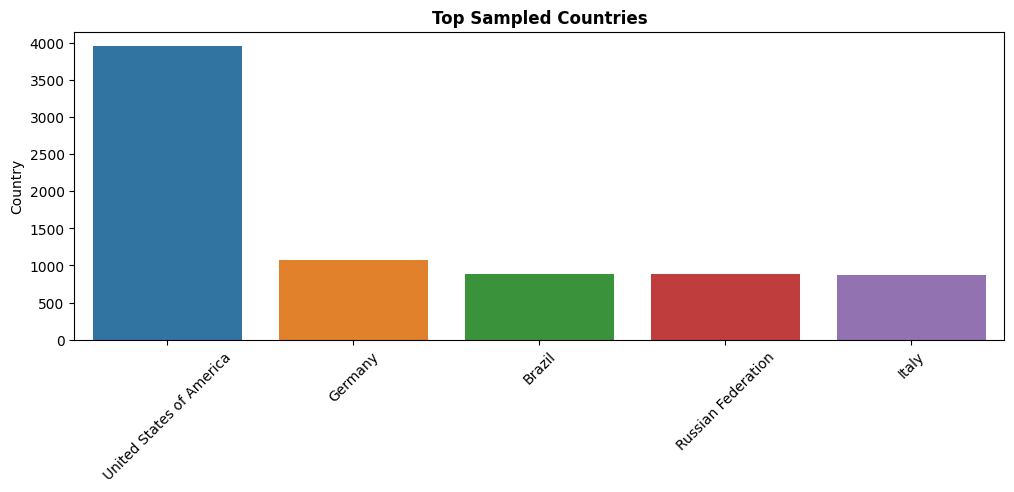

In [23]:
#Getting most occuring Countries to plot
top_countries = df["Country"].value_counts().head()
print(top_countries)
#Plotting Countries in Countplot
fig, ax = plt.subplots(figsize=(12,4))
sns.barplot(df, x=top_countries.index, y=top_countries)
plt.xticks(rotation=45)
ax.set_title("Top Sampled Countries", fontweight="bold");

## City

Santa Cruz      17
San Fernando    16
Santa Ana       15
San Juan        14
Springfield     12
Name: City, dtype: int64


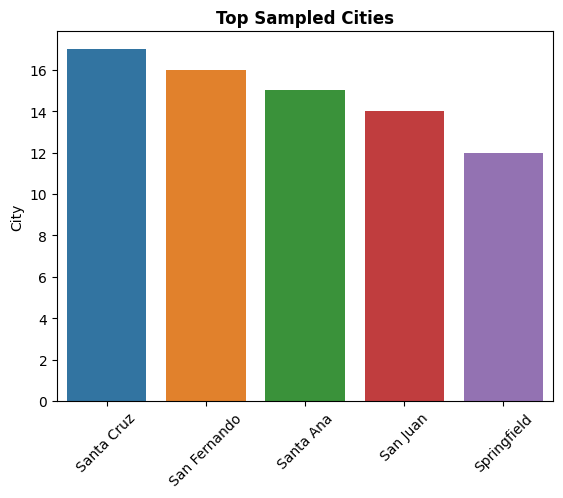

In [24]:
#Getting most occuring Cities to plot
top_cities = df["City"].value_counts().head()
print(top_cities)
#Plotting Cities in Countplot
fig, ax = plt.subplots()
sns.barplot(df, x=top_cities.index, y=top_cities)
plt.xticks(rotation=45)
ax.set_title("Top Sampled Cities", fontweight="bold");

## AQI Value

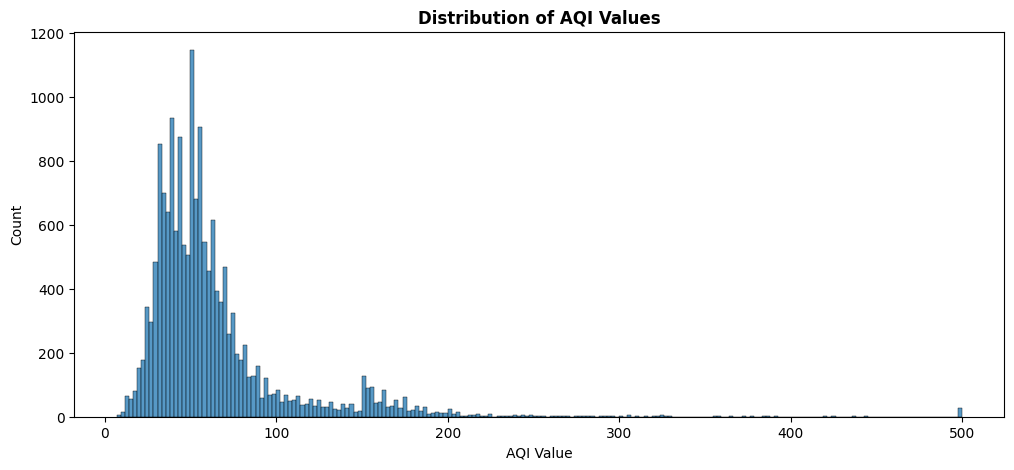

In [25]:
#Plotting AQI in Histogram
fig, ax = plt.subplots(figsize=(12,5))
sns.histplot(df, x="AQI Value")
ax.set_title("Distribution of AQI Values", fontweight="bold");

## AQI Category

United States of America    3954
Germany                     1072
Brazil                       890
Russian Federation           889
Italy                        866
Name: Country, dtype: int64


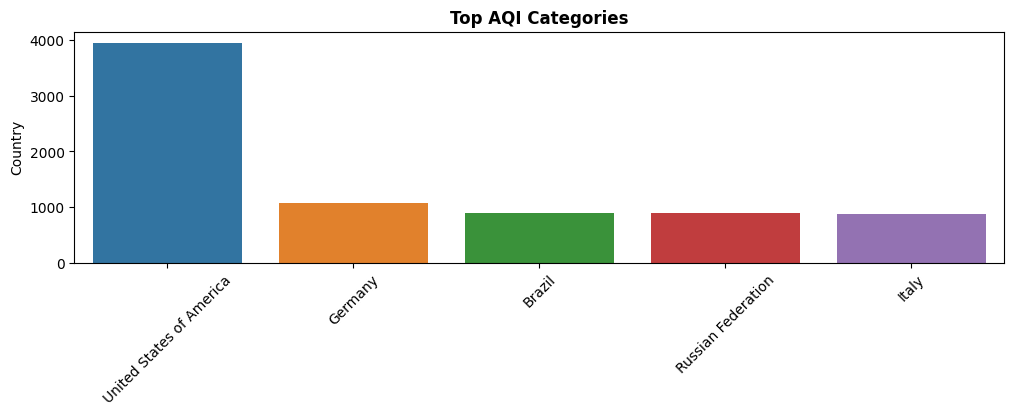

In [26]:
#Getting most occuring Categories to plot
top_category = df["AQI Category"].value_counts().head()
print(top_countries)
#Plotting Categories in Countplot
fig, ax = plt.subplots(figsize=(12,3))
sns.barplot(df, x=top_countries.index, y=top_countries)
plt.xticks(rotation=45)
ax.set_title("Top AQI Categories", fontweight="bold");

## CO AQI Value

1    10956
2     2292
0     2020
3      758
4      337
Name: CO AQI Value, dtype: int64


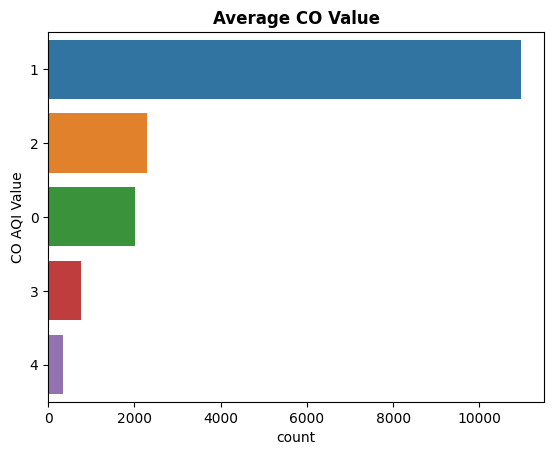

In [27]:
#Getting most occuring co aqi categories to plot
co = df["CO AQI Value"].value_counts().head()
print(co)
#Plotting CO values in Bar Chart
order=[1,2,0,3,4]
fig, ax = plt.subplots()
sns.countplot(df, y="CO AQI Value", order=order)
ax.set_title("Average CO Value", fontweight="bold");

## CO AQI Category

Good                              16691
Unhealthy for Sensitive Groups        3
Moderate                              1
Name: CO AQI Category, dtype: int64


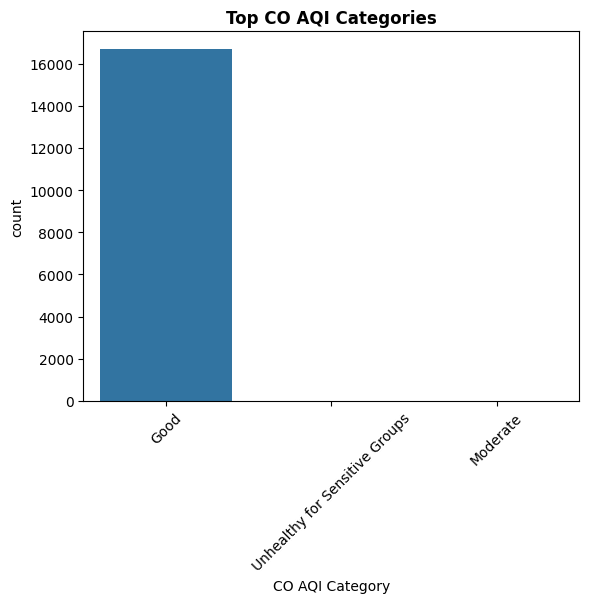

In [28]:
#Getting most occuring co aqi categories to plot
co = df["CO AQI Category"].value_counts().head()
print(co)
#Plotting Countries in Countplot
fig, ax = plt.subplots()
sns.countplot(df, x="CO AQI Category")
plt.xticks(rotation=45)
ax.set_title("Top CO AQI Categories", fontweight="bold");

## Ozone AQI Value

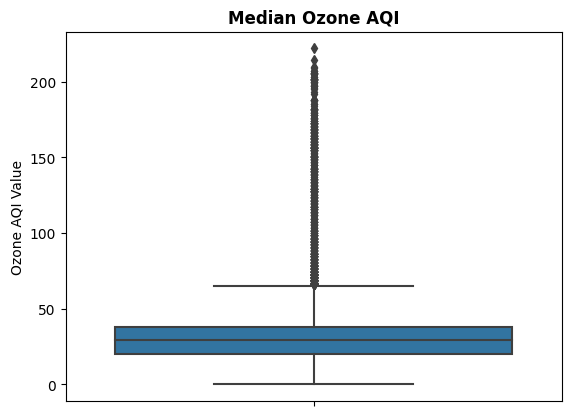

In [29]:
#Ploting Ozone AQI Value in Boxplot
fig, ax = plt.subplots()
sns.boxplot(df, y="Ozone AQI Value")
ax.set_title("Median Ozone AQI", fontweight="bold");

## Ozone AQI Category

Good                              15529
Moderate                            806
Unhealthy for Sensitive Groups      176
Unhealthy                           159
Very Unhealthy                       25
Name: Ozone AQI Category, dtype: int64


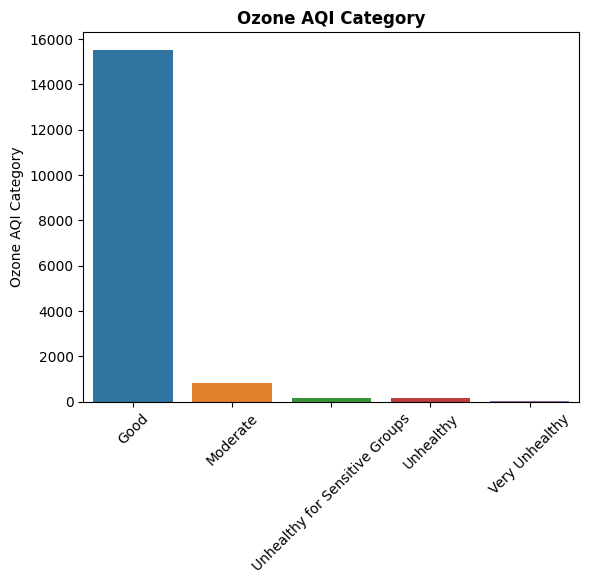

In [30]:
#Getting most occuring Categories to plot
top_category = df["Ozone AQI Category"].value_counts().head()
print(top_category)
#Plotting Categories in Countplot
fig, ax = plt.subplots()
sns.barplot(df, x=top_category.index, y=top_category)
plt.xticks(rotation=45)
ax.set_title("Ozone AQI Category", fontweight="bold");

## NO2 AQI Value

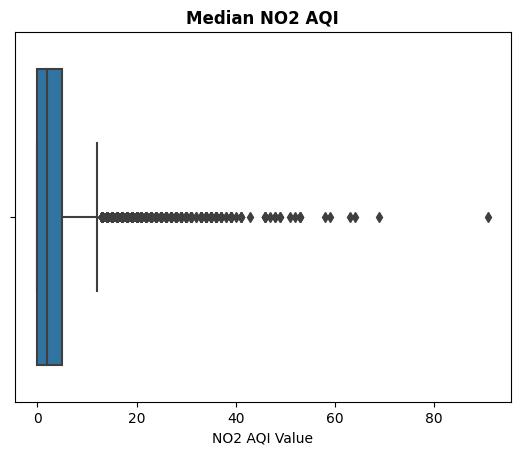

In [31]:
#Ploting NO2 AQI Value in Boxplot
fig, ax = plt.subplots()
sns.boxplot(df, x="NO2 AQI Value")
ax.set_title("Median NO2 AQI", fontweight="bold");

## NO2 AQI Category

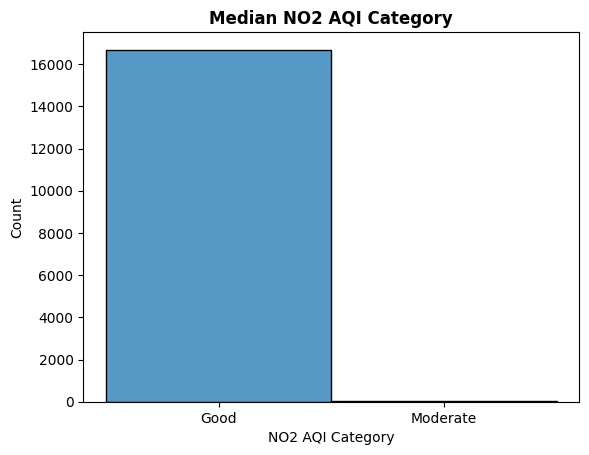

In [32]:
#Ploting NO2 AQI Value in Boxplot
fig, ax = plt.subplots()
sns.histplot(df, x="NO2 AQI Category")
ax.set_title("Median NO2 AQI Category", fontweight="bold");

## PM2.5 AQI Value  

50    413
52    364
54    354
51    347
53    324
Name: PM2.5 AQI Value, dtype: int64


Text(0.5, 1.0, 'PM2.5 AQI Value  ')

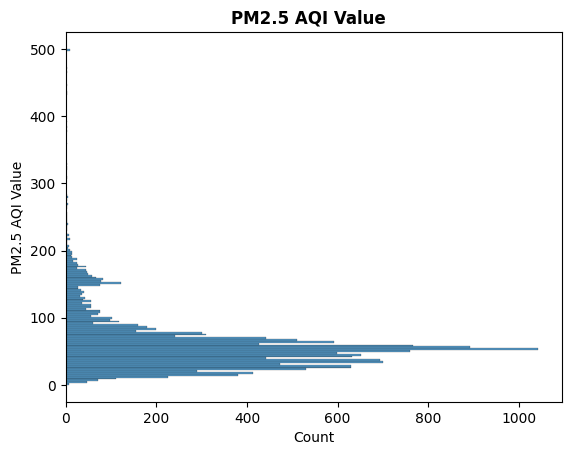

In [33]:
#Getting most occuring co aqi categories to plot
co = df["PM2.5 AQI Value"].value_counts().head()
print(co)
#Plotting CO values in Bar Chart
# order=[1,2,0,3,4]
fig, ax = plt.subplots()
sns.histplot(df, y="PM2.5 AQI Value")
ax.set_title("PM2.5 AQI Value  ", fontweight="bold")

## PM2.5 AQI Category

Good                              7936
Moderate                          6882
Unhealthy for Sensitive Groups     881
Unhealthy                          828
Very Unhealthy                     115
Name: PM2.5 AQI Category, dtype: int64


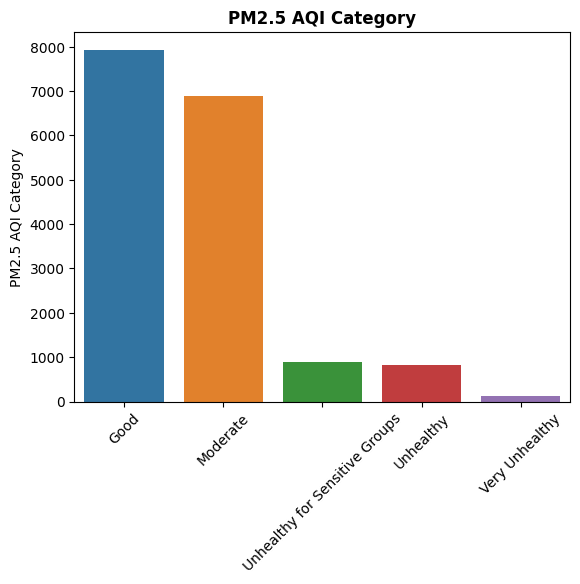

In [34]:
#Getting most occuring Categories to plot
top_category = df["PM2.5 AQI Category"].value_counts().head()
print(top_category)
#Plotting Categories in Countplot
fig, ax = plt.subplots()
sns.barplot(df, x=top_category.index, y=top_category)
plt.xticks(rotation=45)
ax.set_title("PM2.5 AQI Category", fontweight="bold");

## Correlation Heatmap

<ipython-input-35-6f713c15d825>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


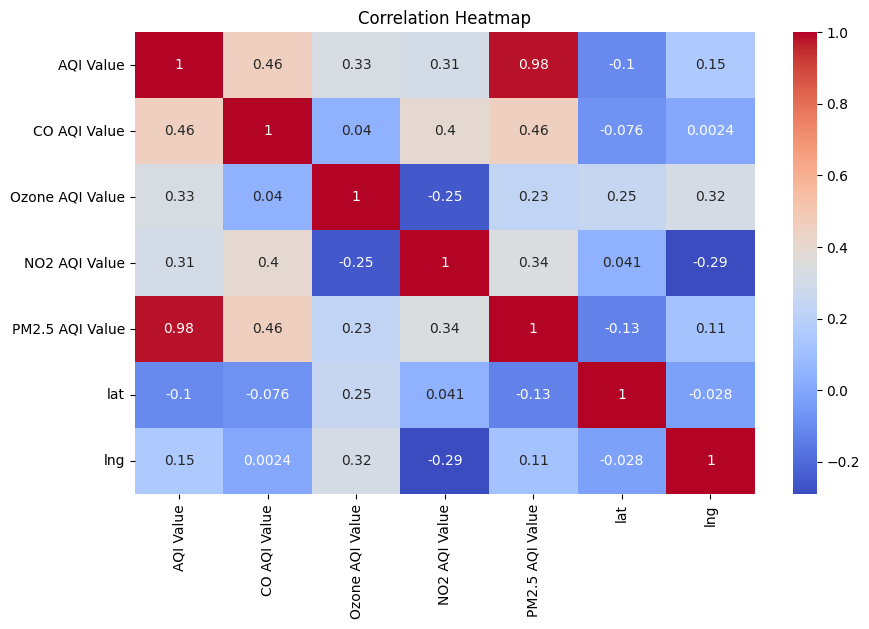

In [35]:
# Calculate the correlation matrix
corr_matrix = df.corr()
# Create a heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show();

### Correlation Results

The highest numeric corrlations with our target `AQI Value` is `PM2.5 AQI Value` (correlation of .98) followed by `CO AQI Value` (corrleation of .46).

Correlation amongst features is between `CO AQI Value` and `PM2.5 AQI Value` (correlation of .46).

### AQI Value vs. PM2.5 AQI Value

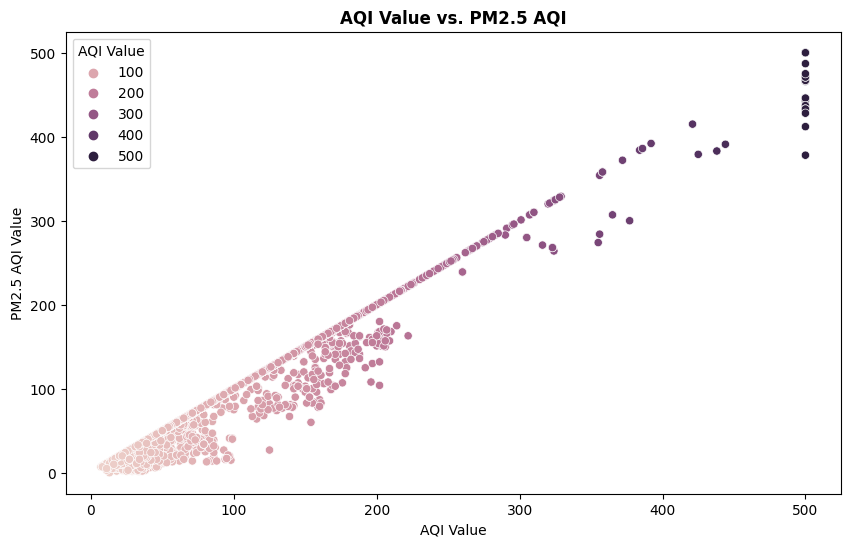

In [36]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(df, x="AQI Value", y="PM2.5 AQI Value", hue="AQI Value")
ax.set_title("AQI Value vs. PM2.5 AQI", fontweight="bold");

In [37]:
df["CO AQI Value"].describe()

count    16695.000000
mean         1.342138
std          2.371379
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        133.000000
Name: CO AQI Value, dtype: float64

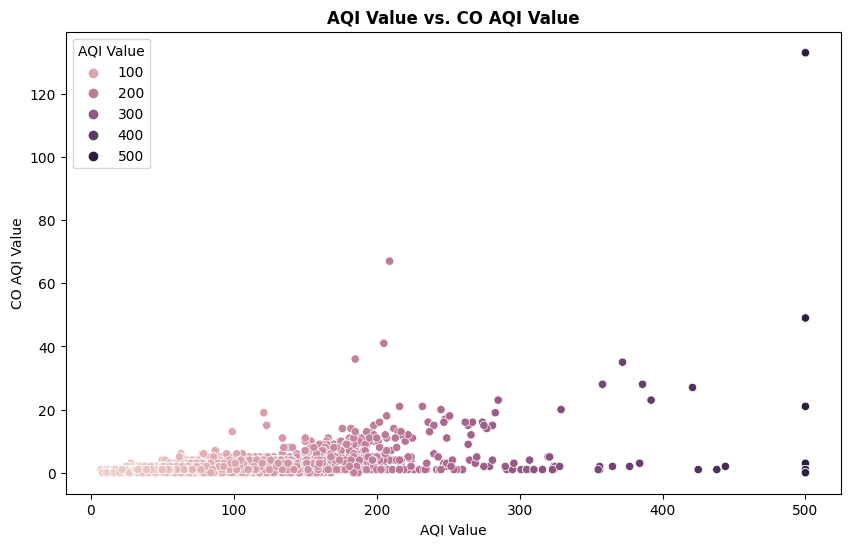

In [38]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(df, x="AQI Value", y="CO AQI Value", hue="AQI Value")
ax.set_title("AQI Value vs. CO AQI Value", fontweight="bold");

### CO AQI Value vs. PM2.5 AQI Value

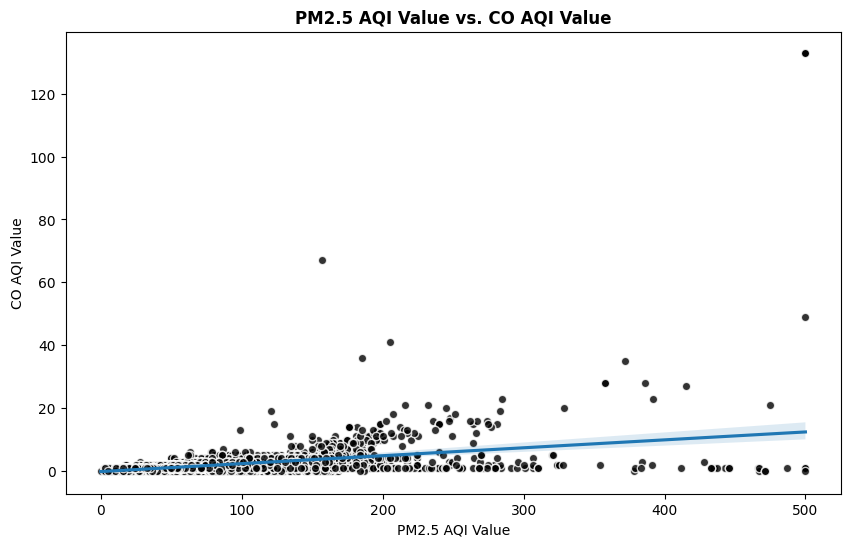

In [39]:
fig, ax = plt.subplots(figsize=(10,6))
sns.regplot(df, x="PM2.5 AQI Value", y="CO AQI Value", scatter_kws={"color": "black", "edgecolor":"white"})
ax.set_title("PM2.5 AQI Value vs. CO AQI Value", fontweight="bold");

## City vs. AQI Value. -- Should i get the mean API Score for each city and then sort from top 10 most polutted cities?

13.2
50    413
52    374
35    366
51    359
54    352
39    337
34    334
45    328
53    328
37    323
Name: AQI Value, dtype: int64


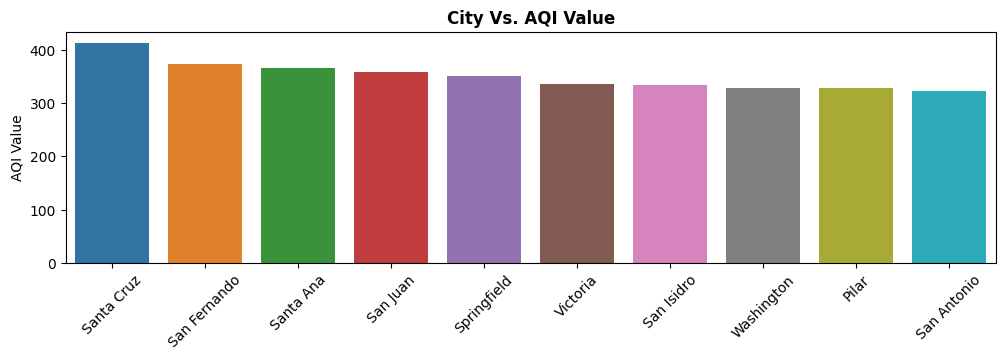

In [40]:
# #Getting most occuring Cities to plot
top_cities = df["City"].value_counts().head(10)
print(top_cities.mean())
top_aqi = df["AQI Value"].value_counts(ascending=False).head(10)
print(top_aqi)
# df.groupby(by=[top_aqi,top_cities])
#Plotting Cities in Countplot
fig, ax = plt.subplots(figsize=(12,3))
sns.barplot(df, x=top_cities.index, y=top_aqi)
plt.xticks(rotation=45)
ax.set_title("City Vs. AQI Value", fontweight="bold");

## City vs. PM2.5 AQI Value

Good                              7936
Moderate                          6882
Unhealthy for Sensitive Groups     881
Unhealthy                          828
Very Unhealthy                     115
Name: PM2.5 AQI Category, dtype: int64


TypeError: ignored

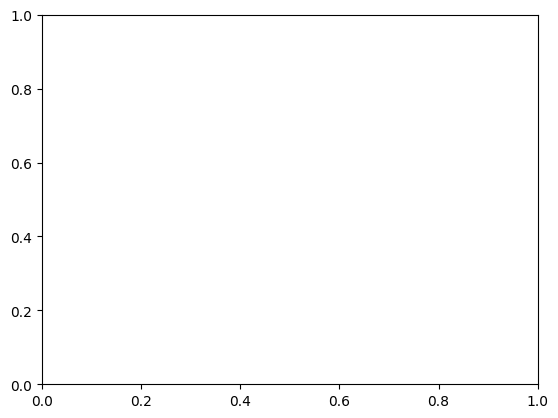

In [41]:
#Getting most occuring Categories to plot
top_category = df["PM2.5 AQI Category"].value_counts().head()
print(top_category)
#Plotting Categories in Countplot
fig, ax = plt.subplots()
sns.barplot(df, x="City", y="PM2.5 AQI Category",hue="AQI Category")
plt.xticks(rotation=45)
ax.set_title("PM2.5 AQI Category", fontweight="bold");

## PM2.5 AQI Value vs. AQI Value